In [1]:
! pip install --quiet "pandas" "torch" "torchvision" "ipython[notebook]" "seaborn" "pytorch-lightning" "torchmetrics" "lightning-bolts"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 17.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rashiai2022","key":"df070ea49cc44c8f5b8bf34a4d9c3463"}'}

In [4]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 67 Aug 16 11:15 kaggle.json
/content


In [5]:
!kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11814        472  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3850        137  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            804         29  1.0              
arnavsmayan/netflix-userbase-datase

In [6]:
!kaggle datasets download -d aladdinpersson/pascal-voc-dataset-used-in-yolov3-video

100% 4.30G/4.31G [00:45<00:00, 76.7MB/s]
100% 4.31G/4.31G [00:45<00:00, 102MB/s] 


In [7]:
!unzip /content/pascal-voc-dataset-used-in-yolov3-video.zip

Streaming output truncated to the last 5000 lines.
  inflating: PASCAL_VOC/labels/2009_004289.txt  
  inflating: PASCAL_VOC/labels/2009_004290.txt  
  inflating: PASCAL_VOC/labels/2009_004291.txt  
  inflating: PASCAL_VOC/labels/2009_004295.txt  
  inflating: PASCAL_VOC/labels/2009_004298.txt  
  inflating: PASCAL_VOC/labels/2009_004300.txt  
  inflating: PASCAL_VOC/labels/2009_004301.txt  
  inflating: PASCAL_VOC/labels/2009_004303.txt  
  inflating: PASCAL_VOC/labels/2009_004307.txt  
  inflating: PASCAL_VOC/labels/2009_004308.txt  
  inflating: PASCAL_VOC/labels/2009_004309.txt  
  inflating: PASCAL_VOC/labels/2009_004312.txt  
  inflating: PASCAL_VOC/labels/2009_004315.txt  
  inflating: PASCAL_VOC/labels/2009_004316.txt  
  inflating: PASCAL_VOC/labels/2009_004317.txt  
  inflating: PASCAL_VOC/labels/2009_004319.txt  
  inflating: PASCAL_VOC/labels/2009_004322.txt  
  inflating: PASCAL_VOC/labels/2009_004323.txt  
  inflating: PASCAL_VOC/labels/2009_004324.txt  
  inflating: PASCA

In [8]:
#%cd /kaggle/working
!git clone https://github.com/RashiTech/S13.git
%cd S13
!mkdir -p checkpoints

# !pip install -qr requirements.txt
# !rm -rf lightning_logs
!ls

Cloning into 'S13'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 78 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (78/78), 37.59 KiB | 2.89 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/S13
checkpoints  dataset.py  model.py   train.py  yolov3.py
config.py    loss.py	 README.md  utils.py


In [9]:
import torch
from yolov3 import YOLOV3_PL

In [10]:
model = YOLOV3_PL()
model.load_state_dict(torch.load('/content/drive/MyDrive/S13/S13/model.pth'))
dataloader = model.test_dataloader()

In [11]:
import config
from utils import *

In [12]:
check_class_accuracy(model.to('cuda'), dataloader, threshold=0.05)

100%|██████████| 155/155 [02:03<00:00,  1.25it/s]

Class accuracy is: 84.804832%
No obj accuracy is: 98.179451%
Obj accuracy is: 78.331551%


In [15]:
pred_boxes, true_boxes = get_evaluation_bboxes(
                dataloader,
                model,
                iou_threshold=config.NMS_IOU_THRESH,
                anchors=config.ANCHORS,
                threshold=0.05,
            )

100%|██████████| 155/155 [19:40<00:00,  7.62s/it]


In [16]:
mapval = mean_average_precision(
    pred_boxes,
    true_boxes,
    iou_threshold=config.MAP_IOU_THRESH,
    box_format="midpoint",
    num_classes=config.NUM_CLASSES,
)

In [17]:
mapval

tensor(0.5109)

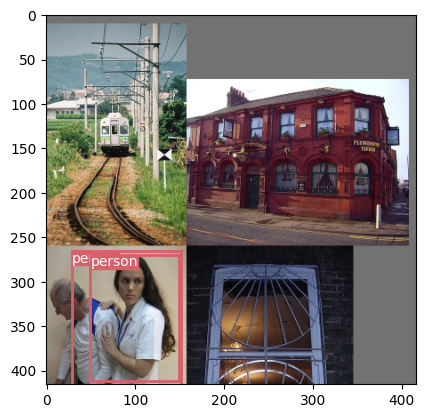

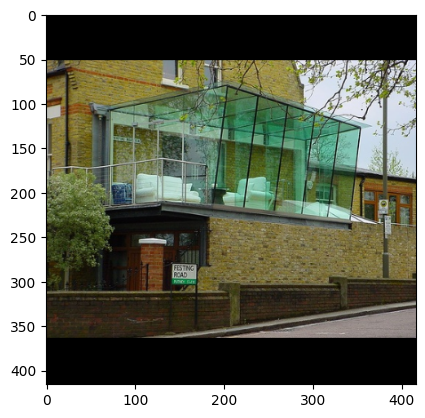

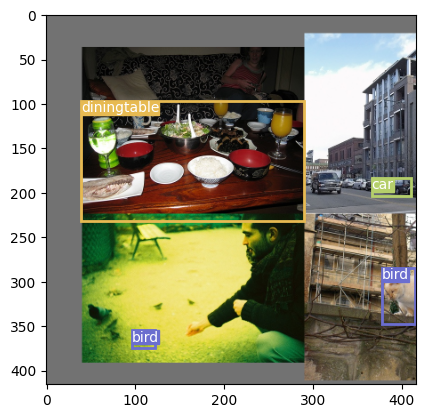

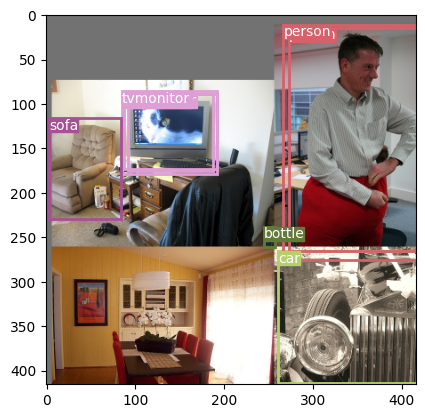

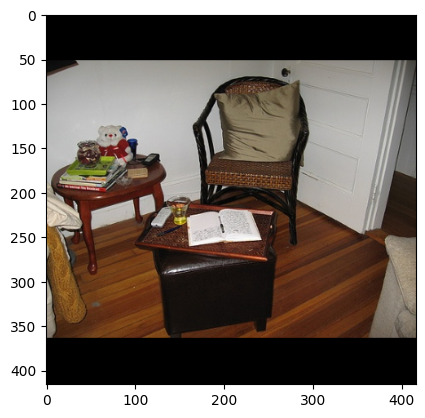

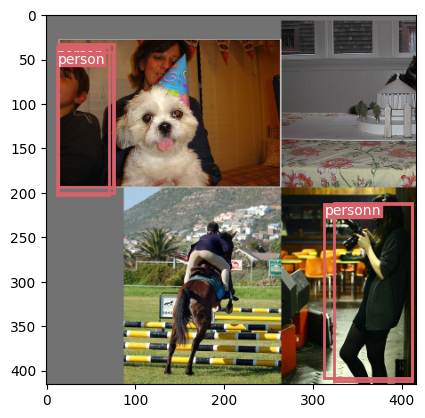

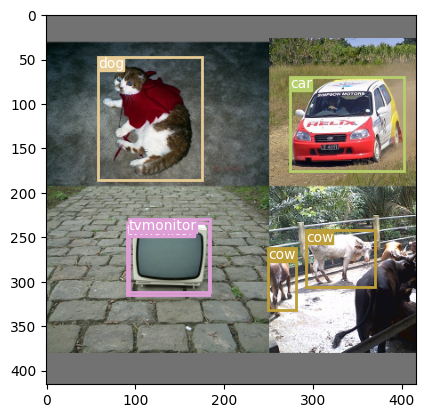

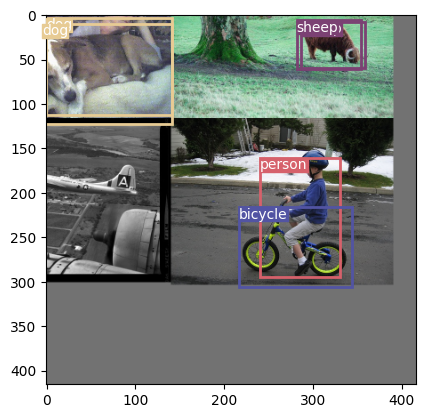

In [26]:
plot_couple_examples(model, dataloader, 0.8, 0.9, torch.Tensor(config.SCALED_ANCHORS).to('cuda'))